In [48]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



In [49]:
iris = pd.read_csv(r"C:\Users\nithe\OneDrive\Desktop/Iris.csv") #Load Data
iris.drop('Id',inplace=True,axis=1) #Drop Id column

In [50]:
X = iris.iloc[:,:-1].values #Set our training data

y = iris.iloc[:,-1].values #We'll use this just for visualization as clustering doesn't require labels

In [51]:
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [52]:
fig = px.pie(iris, 'Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],title='Data Distribution',template='plotly')

fig.show()

In [53]:
fig = px.box(data_frame=iris, x='Species',y='SepalLengthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [54]:
fig = px.histogram(data_frame=iris, x='SepalLengthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=50)
fig.show()

In [55]:
fig = px.box(data_frame=iris, x='Species',y='SepalWidthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [56]:
fig = px.histogram(data_frame=iris, x='SepalWidthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [57]:
fig = px.box(data_frame=iris, x='Species',y='PetalLengthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [58]:
fig = px.histogram(data_frame=iris, x='PetalLengthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [59]:
fig = px.box(data_frame=iris, x='Species',y='PetalWidthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [60]:
fig = px.histogram(data_frame=iris, x='PetalWidthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

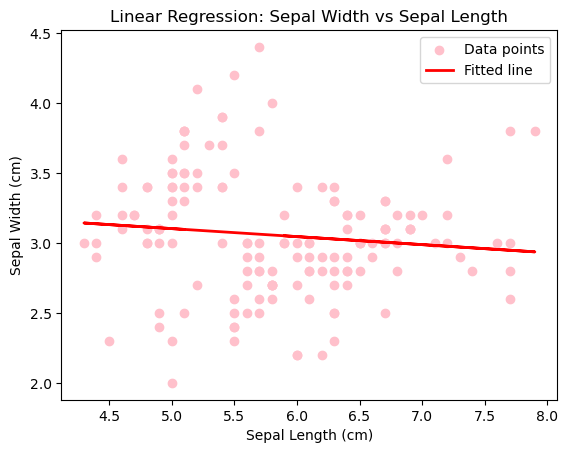

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Extracting features and target variable
X = iris['SepalLengthCm'].values.reshape(-1, 1)  # Features: Sepal Length
y = iris['SepalWidthCm'].values.reshape(-1, 1)   # Target variable: Sepal Width

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting the dataset and the fitted line
plt.scatter(X, y, color='pink', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Linear Regression: Sepal Width vs Sepal Length')
plt.legend()
plt.show()


In [62]:
fig = px.scatter(data_frame=iris, x='SepalLengthCm',y='SepalWidthCm',color='Species',size='PetalLengthCm',template='seaborn',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)

fig.update_layout(width=800, height=600,
                  xaxis=dict(color="#BF40BF"),
                 yaxis=dict(color="#BF40BF"))
fig.show()

In [63]:
fig = px.scatter(data_frame=iris, x='PetalLengthCm',y='PetalWidthCm'
           ,color='Species',size='SepalLengthCm',template='seaborn',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)

fig.update_layout(width=800, height=600,
                  xaxis=dict(color="#BF40BF"),
                 yaxis=dict(color="#BF40BF"))
fig.show()

In [64]:
sse = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i , max_iter=300)
    kmeans.fit(X) 
    sse.append(kmeans.inertia_)

fig = px.line(y=sse,template="seaborn",title='Eblow Method')
fig.update_layout(width=800, height=600,
title_font_color="#BF40BF", 
xaxis=dict(color="#BF40BF",title="Clusters"), 
yaxis=dict(color="#BF40BF",title="SSE"))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Program

In [65]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Preprocessing: Encode species labels
label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

# Split dataset into features (X) and target (y)
X = iris.drop('Species', axis=1)
y = iris['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot fitting graph with regression line
def plot_fitting_graph_with_regression(X_train, y_train, X_test, y_test, model):
    train_accuracy = []
    test_accuracy = []
    degrees = range(1, 11)  # Degrees of polynomial regression to consider
    
    for degree in degrees:
        # Create polynomial regression model
        polynomial_model = make_pipeline(PolynomialFeatures(degree), model())
        
        # Fit polynomial regression model
        polynomial_model.fit(X_train, y_train)
        
        # Predict on training data
        y_train_pred = polynomial_model.predict(X_train)
        train_accuracy.append(accuracy_score(y_train, y_train_pred.round()))
        
        # Predict on testing data
        y_test_pred = polynomial_model.predict(X_test)
        test_accuracy.append(accuracy_score(y_test, y_test_pred.round()))
    
    # Fit a linear regression model to the accuracy data
    regression_model = LinearRegression()
    regression_model.fit(np.array(degrees).reshape(-1, 1), test_accuracy)
    regression_line = regression_model.predict(np.array(degrees).reshape(-1, 1))
    
    # Plotting the fitting graph with regression line
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_accuracy, label='Train Accuracy')
    plt.plot(degrees, test_accuracy, label='Test Accuracy')
    plt.plot(degrees, regression_line, linestyle='--', color='red', label='Regression Line')
    plt.title('Polynomial Regression Fitting Graph for Iris Species Dataset')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot fitting graph with regression line for Iris species dataset
plot_fitting_graph_with_regression(X_train, y_train, X_test, y_test, KNeighborsClassifier)